Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction (6).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-nu

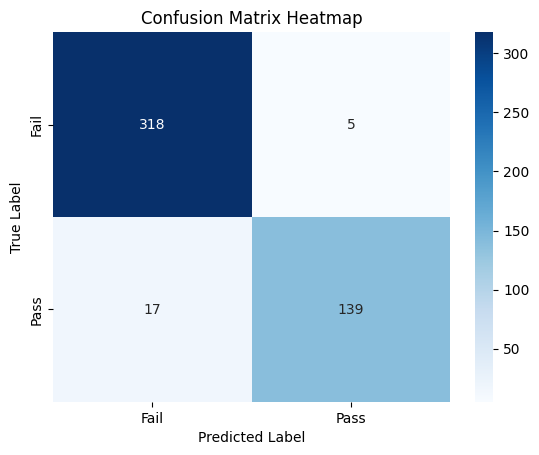

Accuracy: 0.954070981210856
Precision: 0.9652777777777778
Recall: 0.8910256410256411

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       323
           1       0.97      0.89      0.93       156

    accuracy                           0.95       479
   macro avg       0.96      0.94      0.95       479
weighted avg       0.95      0.95      0.95       479



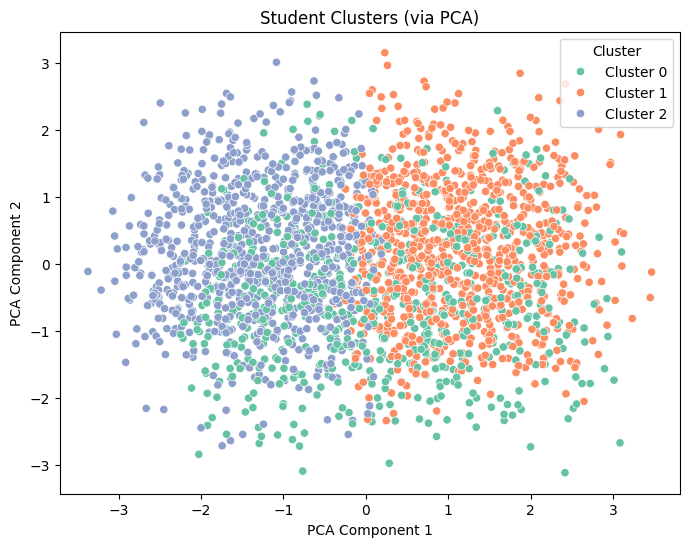

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Allow manual upload
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))

# Preview dataset
df.head()


# Let's see the structure of the data
print(df.info())

# Drop irrelevant columns if any (adjust as per your dataset)
# Example: df = df.drop(['StudentID'], axis=1)

# Encode categorical features if any
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
df['Pass'] = df['GradeClass'].apply(lambda x: 1 if x <= 2 else 0)
# Assuming the target column is 'Pass' or something similar; change as needed
X = df.drop(['StudentID', 'GradeClass', 'Pass'], axis=1)
y = df['Pass']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Confusion matrix and evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heatmap
# Define class labels
labels = ['Fail', 'Pass']

# Plot confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Change average if multiclass
print("Recall:", recall_score(y_test, y_pred, average='binary'))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use relevant features for clustering
features = df.drop(['StudentID', 'GradeClass', 'Pass'], axis=1)

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plot clusters with labeled legend
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], hue=cluster_labels, palette='Set2')

# Optional: If you want to label clusters manually
handles, _ = plt.gca().get_legend_handles_labels()
labels = [f'Cluster {i}' for i in range(kmeans.n_clusters)]
plt.legend(handles=handles, labels=labels, title='Cluster')

plt.title("Student Clusters (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

